<a href="https://colab.research.google.com/github/AgnesMachau/Moringa-Core-Independent-Project-Week-2/blob/main/Moringa_Data_Science_Core_Independent_Project_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Defining the question**

To predict the results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly. 

The datasets to be used are <a href="https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc">here</a>

##**The Metric for success**

##**Context**

##**Experimental Design Taken**

##**Data Appropriateness**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import scipy.stats as stats

In [2]:
#reading the fifa dataset
#previewing the fifa dataset
fifa_ranking = pd.read_csv('fifa_ranking.csv')
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
#readind the results dataset
#previewing the results dataset
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
#checking the shape of the fifa dataset
fifa_ranking.shape

(57793, 16)

In [5]:
#checking the shape of the results dataset
results.shape

(40839, 9)

In [6]:
#checking the description of the fifa dataset
fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [7]:
#checking the description of the results dataset
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [8]:
#checking the information of the fifa dataset
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [9]:
#checking the information of the results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [10]:
# Description of the qualitative columns

fifa_ranking.describe(include = 'object')

,country_full,country_abrv,confederation,rank_date
count,57793,57793,57793,57793
unique,216,216,6,286
top,Sudan,SDN,UEFA,2017-03-09
freq,325,325,14933,211


In [11]:
# Description of the qualitative columns

results.describe(include = 'object')

,date,home_team,away_team,tournament,city,country
count,40839,40839,40839,40839,40839,40839
unique,15115,309,306,109,1960,266
top,2012-02-29,Brazil,Uruguay,Friendly,Kuala Lumpur,United States
freq,66,563,536,16911,581,1144


In [12]:
#checking the data types of fifa dataset
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [13]:
#importing the datetime library
#changing the data type of rank_date

import datetime
fifa_ranking["rank_date"] = fifa_ranking["rank_date"].apply(pd.to_datetime)
fifa_ranking.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [14]:
#checking the data type of results dataset
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [15]:
#changing the date data type to datetime
results["date"] = results["date"].apply(pd.to_datetime)
results.dtypes


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [16]:
#checking the fifa dataset columns
fifa_ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

##**Data Cleaning**

###**Cleaning the fifa dataset**

Data Consistency

In [17]:
#checking for any duplicates
#dropping duplicates
fifa_ranking.duplicated()
fifa_clean =fifa_ranking.drop_duplicates()
fifa_clean.shape

(57756, 16)

Data Completeness

In [18]:
# Determining the number of null values in each column

fifa_clean.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

Data validity

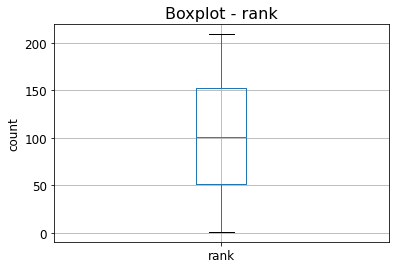

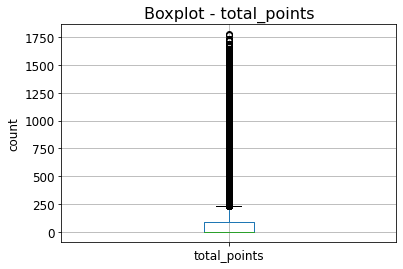

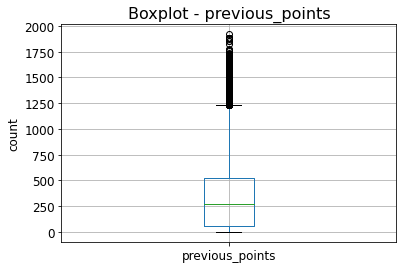

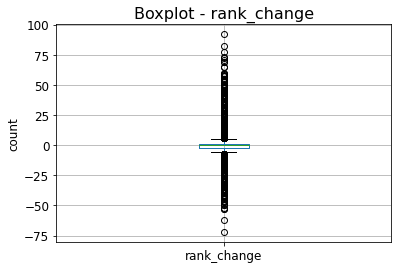

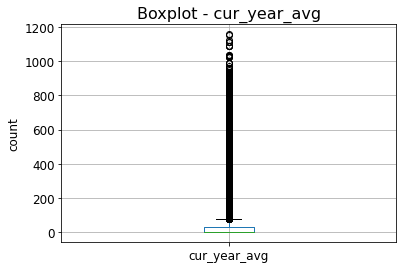

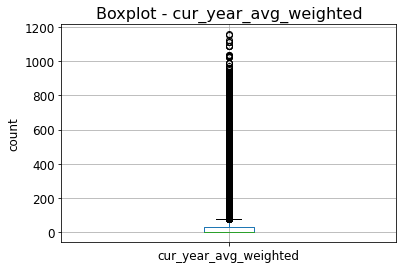

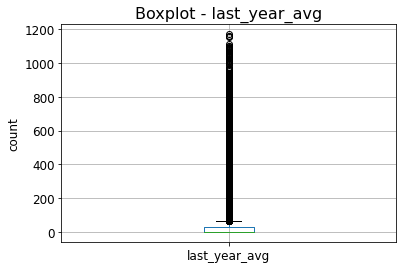

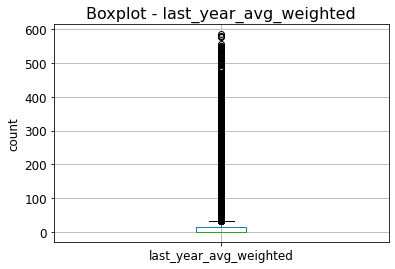

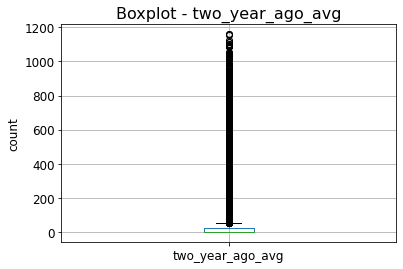

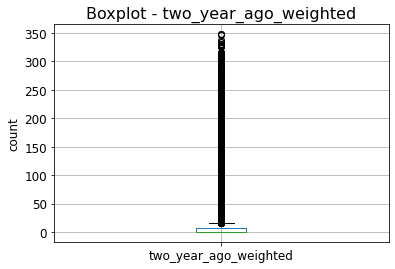

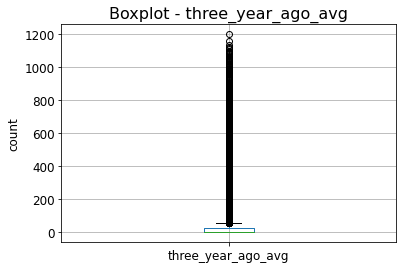

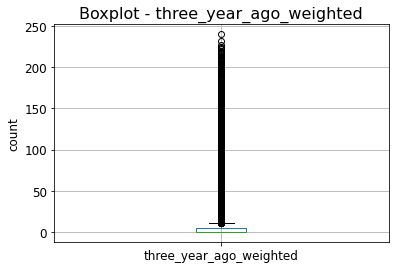

In [19]:
#Checking for Outliers
cols = ['rank', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted']

for column in cols:
    plt.figure()
    fifa_clean.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

In [20]:
#droping columns that are not useful
fifa_clean1 = fifa_clean.drop(columns = ['country_abrv', 'total_points', 'previous_points', 'rank_change',
       'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted'])
fifa_clean1

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08
...,...,...,...,...
57788,206,Anguilla,CONCACAF,2018-06-07
57789,206,Bahamas,CONCACAF,2018-06-07
57790,206,Eritrea,CAF,2018-06-07
57791,206,Somalia,CAF,2018-06-07


###**Cleaning the results dataset**

Data Consistency

In [21]:
#checking for any duplicates
#dropping duplicates
results.duplicated()
results_clean =results.drop_duplicates()
results_clean.shape



(40839, 9)

Data Completeness

In [22]:
#checking for any null values
results_clean.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Data Validity

In [23]:
results_clean.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

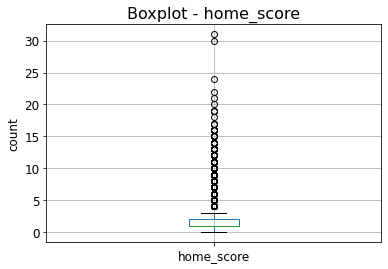

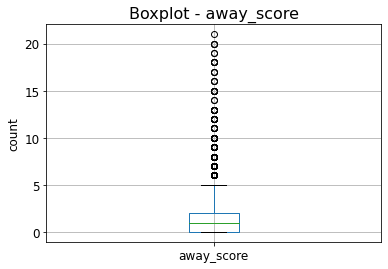

In [24]:
#Checking for Outliers
cols = ['home_score', 'away_score']

for column in cols:
    plt.figure()
    results_clean.boxplot([column], fontsize= 12)
    plt.ylabel('count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)

In [25]:
#droping columns that are not useful
results_clean1 = results_clean.drop(columns = ['city', 'neutral'])
results_clean1

,date,home_team,away_team,home_score,away_score,tournament,country
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,England
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,England
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland
...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India


##**Merging the Datasets Based on Home Team**

In [26]:
#combining the two datasets based on home team
home_team = pd.merge(results_clean1, fifa_clean1,left_on=['home_team'],right_on=['country_full'], how='left')
home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,28.0,Scotland,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,29.0,Scotland,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,25.0,Scotland,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,24.0,Scotland,UEFA,1993-12-23


In [27]:
#checking the shape of the merged dataset
home_team.shape

(10273115, 11)

In [28]:
#Dropping duplicate columns that have a date that is greater than the rank date
home_team = home_team[home_team.date <= home_team.rank_date]
home_team.shape


(7276872, 11)

In [29]:
#previewing the dataset
home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,28.0,Scotland,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,29.0,Scotland,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,25.0,Scotland,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,24.0,Scotland,UEFA,1993-12-23


In [30]:
#Dropping duplicates by specifying the subsets of columns to be used to identify the duplicates
home_team = home_team.drop_duplicates(subset=['date', 'home_team', 'away_team','home_score','away_score','tournament', 'confederation'], keep='first')

In [31]:
#checkng the remaining columns
home_team.shape

(35659, 11)

In [32]:
#Previewing the dataset
home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,England,11.0,England,UEFA,1993-08-08
572,1874-03-07,Scotland,England,2,1,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08
858,1875-03-06,England,Scotland,2,2,Friendly,England,11.0,England,UEFA,1993-08-08
1144,1876-03-04,Scotland,England,3,0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08


In [33]:
# renaming the rank column

home_team.rename(columns={'rank':'home_team_rank'}, inplace=True)
home_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_team_rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,England,11.0,England,UEFA,1993-08-08
572,1874-03-07,Scotland,England,2,1,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08
858,1875-03-06,England,Scotland,2,2,Friendly,England,11.0,England,UEFA,1993-08-08
1144,1876-03-04,Scotland,England,3,0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08


##**Merging the Datasets Based on Away Team**

In [34]:
#combining the two datasets based on away team
away_team = pd.merge(results_clean1, fifa_clean1,left_on=['away_team'],right_on=['country_full'], how='left')
away_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,5.0,England,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,10.0,England,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,8.0,England,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-12-23


In [35]:
#checking the shape of the merged dataset
away_team.shape

(10195473, 11)

In [36]:
#Dropping duplicate columns that have a date that is greater than the rank date
away_team = away_team[away_team.date <= away_team.rank_date]
away_team.shape

(7224733, 11)

In [37]:
#previewing the dataset
away_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Scotland,5.0,England,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Scotland,10.0,England,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Scotland,8.0,England,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-12-23


In [38]:
#Dropping duplicates by specifying the subsets of columns to be used to identify the duplicates
away_team = away_team.drop_duplicates(subset=['date', 'home_team', 'away_team','home_score','away_score','tournament', 'confederation'], keep='first')
away_team.shape

(35489, 11)

In [39]:
# renaming the rank column

away_team.rename(columns={'rank':'away_team_rank'}, inplace=True)
away_team.head()

,date,home_team,away_team,home_score,away_score,tournament,country,away_team_rank,country_full,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08
286,1873-03-08,England,Scotland,4,2,Friendly,England,30.0,Scotland,UEFA,1993-08-08
572,1874-03-07,Scotland,England,2,1,Friendly,Scotland,11.0,England,UEFA,1993-08-08
858,1875-03-06,England,Scotland,2,2,Friendly,England,30.0,Scotland,UEFA,1993-08-08
1144,1876-03-04,Scotland,England,3,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08


##**Merging the Home team and Away team datasets**

In [40]:
#merging the home_team dataset and the away_team dataset
final_dataset = pd.merge(away_team, home_team,left_on=['date'],right_on=['date'], how='left')

final_dataset.head()

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,country_x,away_team_rank,country_full_x,confederation_x,rank_date_x,home_team_y,away_team_y,home_score_y,away_score_y,tournament_y,country_y,home_team_rank,country_full_y,confederation_y,rank_date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08,Scotland,England,0.0,0.0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08
1,1873-03-08,England,Scotland,4,2,Friendly,England,30.0,Scotland,UEFA,1993-08-08,England,Scotland,4.0,2.0,Friendly,England,11.0,England,UEFA,1993-08-08
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,11.0,England,UEFA,1993-08-08,Scotland,England,2.0,1.0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08
3,1875-03-06,England,Scotland,2,2,Friendly,England,30.0,Scotland,UEFA,1993-08-08,England,Scotland,2.0,2.0,Friendly,England,11.0,England,UEFA,1993-08-08
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,11.0,England,UEFA,1993-08-08,Scotland,England,3.0,0.0,Friendly,Scotland,30.0,Scotland,UEFA,1993-08-08


In [41]:

# dropping duplicates and unnecessary columns

final_dataset = final_dataset.drop(['home_team_y', 'away_team_y', 'home_score_y', 'away_score_y', 
                                          'tournament_y', 'country_full_y', 'confederation_y',
                                          'country_full_x', 'confederation_x', 'rank_date_y', 'rank_date_x'], 1)

final_dataset.head()

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,country_x,away_team_rank,country_y,home_team_rank
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,Scotland,30.0
1,1873-03-08,England,Scotland,4,2,Friendly,England,30.0,England,11.0
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,11.0,Scotland,30.0
3,1875-03-06,England,Scotland,2,2,Friendly,England,30.0,England,11.0
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,11.0,Scotland,30.0


In [42]:

# dropping  duplicates
final_dataset = final_dataset.drop_duplicates(subset=['home_team_x', 'away_team_x', 'home_score_x', 'away_score_x', 'tournament_x'])

final_dataset.shape

(31642, 10)

In [43]:
# renaming columns 

final_dataset.rename(columns={'home_score_x': 'home_score', 
                                 'away_score_x': 'away_score', 'tournament_x': 'tournament'}, inplace=True)
final_dataset.head()

,date,home_team_x,away_team_x,home_score,away_score,tournament,country_x,away_team_rank,country_y,home_team_rank
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,11.0,Scotland,30.0
1,1873-03-08,England,Scotland,4,2,Friendly,England,30.0,England,11.0
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,11.0,Scotland,30.0
3,1875-03-06,England,Scotland,2,2,Friendly,England,30.0,England,11.0
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,11.0,Scotland,30.0


In [44]:
#checking for null values
#dropping null values
final_dataset.isnull().sum()
final_dataset = final_dataset.dropna()

In [45]:
#Checking if the null values have been dropped
final_dataset.isnull().sum()

date              0
home_team_x       0
away_team_x       0
home_score        0
away_score        0
tournament        0
country_x         0
away_team_rank    0
country_y         0
home_team_rank    0
dtype: int64

In [46]:

# dropping the home_team, _away team columns, country_x and country_y columns.

final_dataset = final_dataset.drop(['home_team_x', 'away_team_x', 'country_x', 'country_y'], axis = 1)
final_dataset

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
0,1872-11-30,0,0,Friendly,11.0,30.0
1,1873-03-08,4,2,Friendly,30.0,11.0
2,1874-03-07,2,1,Friendly,11.0,30.0
3,1875-03-06,2,2,Friendly,30.0,11.0
4,1876-03-04,3,0,Friendly,11.0,30.0
...,...,...,...,...,...,...
332006,2018-06-07,3,0,Friendly,95.0,12.0
332011,2018-06-07,3,0,Friendly,66.0,12.0
332016,2018-06-07,0,0,Friendly,59.0,12.0
332021,2018-06-07,2,2,Friendly,47.0,12.0


In [47]:
#checking the unique values of the tournament column
final_dataset['tournament'].nunique()
# Replace FIFA World Cup and FIFA World Cup qaulification
final_dataset["tournament"].replace({"FIFA World Cup": "World Cup", "FIFA World Cup qualification": "World Cup"}, inplace=True)

In [48]:
# Replace values that are not World Cup or Friendly with Other

final_dataset.replace(['British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'Copa Rio Branco', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Copa Artigas', 'GaNEFo',
       "King's Cup", 'Gulf Cup', 'Indonesia Tournament', 'Korea Cup',
       'Brazil Independence Cup', 'Copa Ramón Castilla',
       'Oceania Nations Cup', 'CECAFA Cup', 'Copa Félix Bogado',
       'Kirin Cup', 'CFU Caribbean Cup qualification',
       'CFU Caribbean Cup', 'Amílcar Cabral Cup', 'Mundialito',
       'West African Cup', 'Nehru Cup', 'Merlion Cup', 'UDEAC Cup',
       'Rous Cup', 'Tournoi de France', 'Malta International Tournament',
       'Lunar New Year Cup', 'Dynasty Cup', 'UNCAF Cup', 'Gold Cup',
       'USA Cup', 'Jordan International Tournament', 'Confederations Cup',
       'Island Games', 'United Arab Emirates Friendship Tournament',
       'Oceania Nations Cup qualification', 'Simba Tournament',
       'SAFF Cup', 'AFF Championship', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'COSAFA Cup',
       'Gold Cup qualification', 'SKN Football Festival', 'UNIFFAC Cup',
       'WAFF Championship', 'Millennium Cup', "Prime Minister's Cup",
       'EAFF Championship', 'AFC Challenge Cup', 'FIFI Wild Cup',
       'ELF Cup', 'UAFA Cup qualification',
       'AFC Challenge Cup qualification', 'African Nations Championship',
       'VFF Cup', 'Dragon Cup', 'ABCS Tournament',
       'Nile Basin Tournament', 'Nations Cup', 'Pacific Games', 'OSN Cup',
       'Copa América qualification', 'Intercontinental Cup'],'Other', inplace=True)
final_dataset['tournament'].unique()

array(['Friendly', 'Other', 'World Cup'], dtype=object)

In [49]:
# Categorical boolean mask
categorical_feature_mask = final_dataset.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = final_dataset.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
final_dataset[categorical_cols] = final_dataset[categorical_cols].apply(lambda col: le.fit_transform(col))
final_dataset[categorical_cols]

,tournament
0,0
1,0
2,0
3,0
4,0
...,...
332006,0
332011,0
332016,0
332021,0


Friendly = 0

Other = 1

World_cup = 2

In [50]:
#previewing the final dataset

final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
0,1872-11-30,0,0,0,11.0,30.0
1,1873-03-08,4,2,0,30.0,11.0
2,1874-03-07,2,1,0,11.0,30.0
3,1875-03-06,2,2,0,30.0,11.0
4,1876-03-04,3,0,0,11.0,30.0


##**Exploratory Data Analysis**

###**Univariate Analysis**

In [51]:
#previewing the dataset
final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
0,1872-11-30,0,0,0,11.0,30.0
1,1873-03-08,4,2,0,30.0,11.0
2,1874-03-07,2,1,0,11.0,30.0
3,1875-03-06,2,2,0,30.0,11.0
4,1876-03-04,3,0,0,11.0,30.0


([<matplotlib.patches.Wedge at 0x7f6f14703d10>,
 [Text(-1.0507769084652299, 0.32537346025183744, 'Friendly'),
  Text(0.6047045099121923, -0.918875647567099, 'Other'),
  Text(0.6988895973966784, 0.8494429531467719, 'World Cup')],
 [Text(-0.5731510409810344, 0.17747643286463857, '40.442'),
  Text(0.32983882358846844, -0.501204898672963, '37.644'),
  Text(0.38121250767091547, 0.4633325198982391, '21.915')])

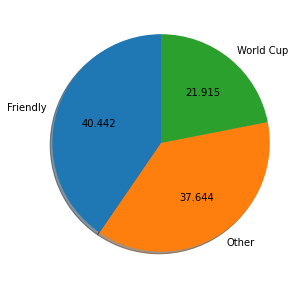

In [52]:
#A pie chart thet represents the tournament column
plt.figure(figsize = (5,5))
plt.pie(final_dataset['tournament'].value_counts(),startangle = 90,autopct = '%.3f',
        labels=['Friendly', 'Other', 'World Cup'],shadow=True)


In [53]:
#A frequency table displaying the tournament types 
#friendly = 0
#other = 1
#world cup = 2
final_dataset.tournament.value_counts()

0    12547
1    11679
2     6799
Name: tournament, dtype: int64

(array([2.6933e+04, 3.4550e+03, 5.2100e+02, 8.3000e+01, 2.2000e+01,
        6.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

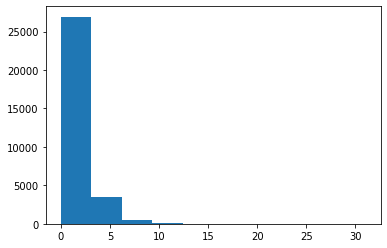

In [54]:
#A histogram of the home score
plt.hist(final_dataset['home_score'])

(array([2.1252e+04, 7.8770e+03, 1.4420e+03, 3.1700e+02, 8.7000e+01,
        2.2000e+01, 1.0000e+01, 7.0000e+00, 5.0000e+00, 6.0000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

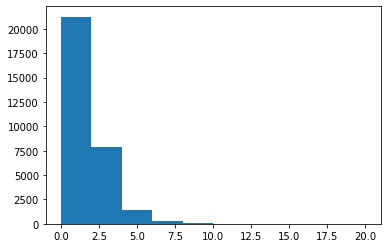

In [55]:
#A histogram of the away score
plt.hist(final_dataset['away_score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


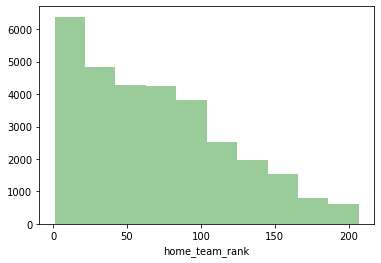

In [56]:
#A distplot representing the home team rank
sns.distplot(final_dataset['home_team_rank'], kde=False, color = 'green',bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


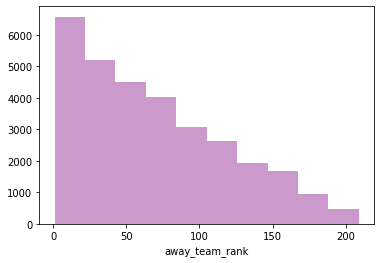

In [57]:
#A distplot representing the away team rank
sns.distplot(final_dataset['away_team_rank'], kde=False, color = 'purple',bins = 10)

####**Measures of Central Tendency**

In [58]:
#The mean, median, and mode of the home score, away score, home team rank and away team rank
print('Home score Mean')
print(final_dataset['home_score'].mean())
print('Away score Mean')
print(final_dataset['away_score'].mean())
print('Home Team Rank Mean')
print(final_dataset['home_team_rank'].mean())
print('Away Team Rank Mean')
print(final_dataset['away_team_rank'].mean())
print('Home score Median')
print(final_dataset['home_score'].median())
print('Away score Median')
print(final_dataset['away_score'].median())
print('Home_team_rank median')
print(final_dataset['home_team_rank'].median())
print('Away_team_rank_median')
print(final_dataset['away_team_rank'].median())
print('Home score Mode')
print(final_dataset['home_score'].mode())
print('Away score Mode')
print(final_dataset['away_score'].mode())
print('Home_team_rank mode')
print(final_dataset['home_team_rank'].mode())
print('Away_team_rank_mode')
print(final_dataset['away_team_rank'].mode())


Home score Mean
1.7767284448025786
Away score Mean
1.2093150684931506
Home Team Rank Mean
69.5615471394037
Away Team Rank Mean
69.05688960515712
Home score Median
1.0
Away score Median
1.0
Home_team_rank median
62.0
Away_team_rank_median
59.0
Home score Mode
0    1
dtype: int64
Away score Mode
0    0
dtype: int64
Home_team_rank mode
0    5.0
dtype: float64
Away_team_rank_mode
0    4.0
dtype: float64


In [59]:
#The mode of the tournament column
final_dataset['tournament'].mode()

0    0
dtype: int64

####**Measures of Dispersion**

In [60]:
#The variance standard deviation and quatiles of home score and away score 
print('Home score Variance')
print(final_dataset['home_score'].var())
print('Away score variance')
print(final_dataset['away_score'].var())
print('Home score standard deviation')
print(final_dataset['home_score'].std())
print('Away score standard deviation')
print(final_dataset['away_score'].std())
print('Home score quatiles')
print(final_dataset['home_score'].quantile([0.25, 0.5, 0.75]))
print('Away score quatiles')
print(final_dataset['away_score'].quantile([0.25, 0.5, 0.75]))

Home score Variance
3.0978725482580867
Away score variance
2.0203296784816813
Home score standard deviation
1.7600774267793127
Away score standard deviation
1.4213830161084946
Home score quatiles
0.25    1.0
0.50    1.0
0.75    3.0
Name: home_score, dtype: float64
Away score quatiles
0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64


####**Skewness and Kurtosis**

In [61]:
#The skewness and kurtosis of the home score and away score
print('Home score skewness')
print(final_dataset['home_score'].skew())
print('Away score skewness')
print(final_dataset['away_score'].skew())
print('Home score kurtosis')
print(final_dataset['home_score'].kurt())
print('Away score kurtosis')
print(final_dataset['away_score'].kurt())

Home score skewness
2.072495932518777
Away score skewness
2.407895707746196
Home score kurtosis
10.82521569362268
Away score kurtosis
12.994063188527154


##**Bivariate Analysis**

In [62]:
#Previewing the dataset
final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
0,1872-11-30,0,0,0,11.0,30.0
1,1873-03-08,4,2,0,30.0,11.0
2,1874-03-07,2,1,0,11.0,30.0
3,1875-03-06,2,2,0,30.0,11.0
4,1876-03-04,3,0,0,11.0,30.0


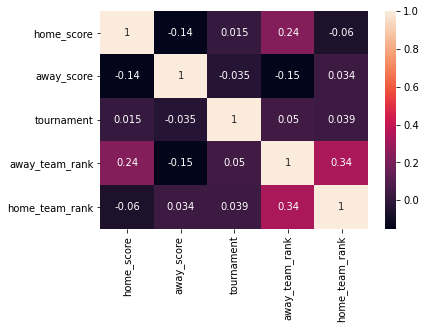

In [63]:
#A heat map showing the correlation of the variables
sns.heatmap(final_dataset.corr(), annot=True)
plt.show()

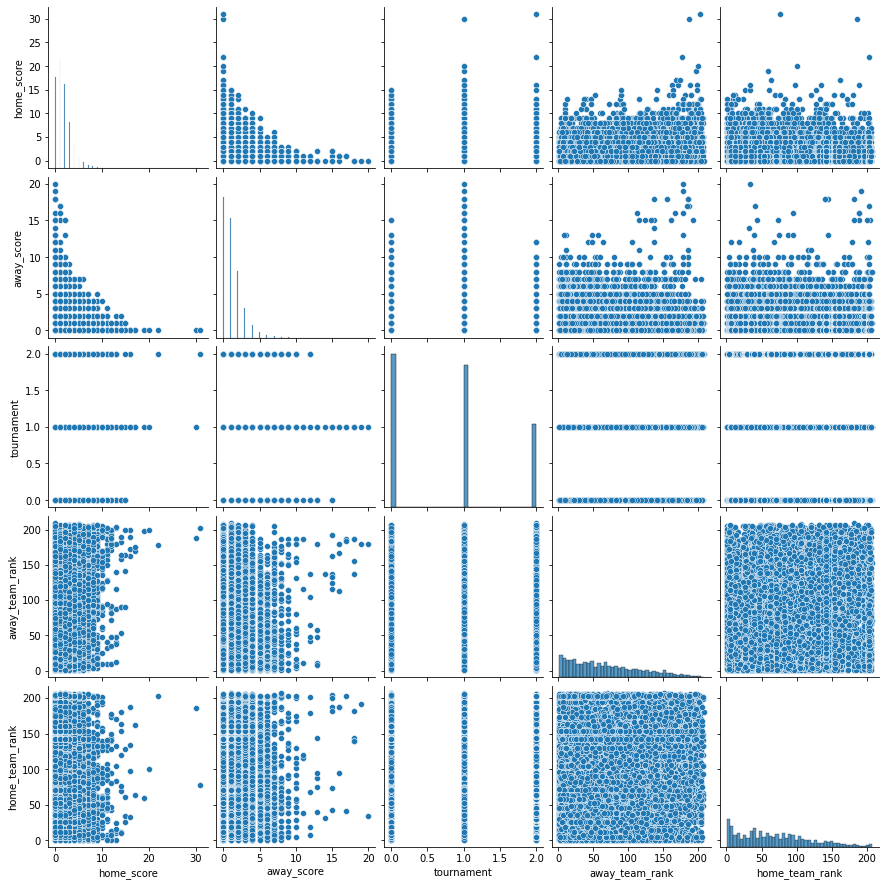

In [64]:
#A pair plot showing correlation of different variables
sns.pairplot(final_dataset)

plt.show()

##**Checking for Multicollinearity**

In [65]:
# Let's display the correlations between the variables
correlations = final_dataset.corr()

correlations

,home_score,away_score,tournament,away_team_rank,home_team_rank
home_score,1.000000,-0.142243,0.014663,0.236034,-0.059917
away_score,-0.142243,1.000000,-0.034708,-0.149303,0.033841
tournament,0.014663,-0.034708,1.000000,0.050354,0.038994
away_team_rank,0.236034,-0.149303,0.050354,1.000000,0.339763
home_team_rank,-0.059917,0.033841,0.038994,0.339763,1.000000


In [66]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,tournament,away_team_rank,home_team_rank
home_score,1.095236,0.105620,-0.003758,-0.298099,0.163479
away_score,0.105620,1.042430,0.029957,0.157629,-0.083673
tournament,-0.003758,0.029957,1.003990,-0.035580,-0.028300
away_team_rank,-0.298099,0.157629,-0.035580,1.247056,-0.445512
home_team_rank,0.163479,-0.083673,-0.028300,-0.445512,1.165099


##**Prediction using Polynormial Regression**

###**Predicting the Home Team Scores given the Home Team Rank**

In [67]:
poly_reg_dataset =  final_dataset.groupby(['home_team_rank']).mean()

poly_reg_dataset.head()

,home_score,away_score,tournament,away_team_rank
home_team_rank,,,,
1.0,1.980519,1.069805,0.800325,51.102273
2.0,2.111465,0.974522,0.716561,43.780255
3.0,1.784810,1.194093,0.902954,43.940928
4.0,2.400000,1.396078,0.721569,49.988235
5.0,1.973903,1.173191,1.005931,43.196916


In [68]:
X = poly_reg_dataset.index.values.reshape(-1, 1)

y = poly_reg_dataset['home_score'].values.reshape(-1, 1)


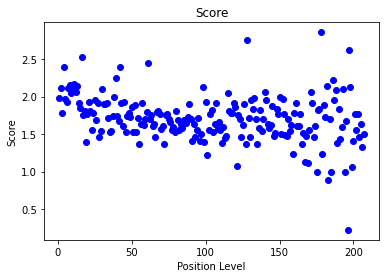

In [69]:
plt.scatter(X, y, color='blue') 
plt.title('Score')
plt.xlabel('Position Level')
plt.ylabel('Score')
plt.show()

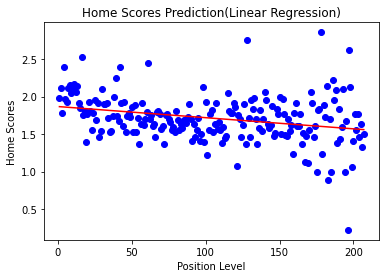

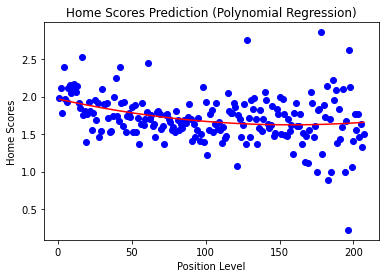

In [70]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home Scores Prediction(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Home Scores')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Scores Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Home Scores')
plt.show()

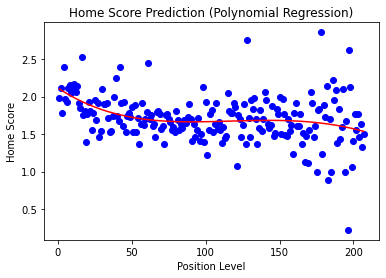

In [71]:
# Let's improve it the model further

# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Score Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Home Score')
plt.show()

In [72]:
# Predict using linear regression
lin_pred = reg_line.predict([[100]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[100]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

Linear prediction: 1
Polynomial prediction: 1


In [73]:
final_dataset

,date,home_score,away_score,tournament,away_team_rank,home_team_rank
0,1872-11-30,0,0,0,11.0,30.0
1,1873-03-08,4,2,0,30.0,11.0
2,1874-03-07,2,1,0,11.0,30.0
3,1875-03-06,2,2,0,30.0,11.0
4,1876-03-04,3,0,0,11.0,30.0
...,...,...,...,...,...,...
332006,2018-06-07,3,0,0,95.0,12.0
332011,2018-06-07,3,0,0,66.0,12.0
332016,2018-06-07,0,0,0,59.0,12.0
332021,2018-06-07,2,2,0,47.0,12.0


###**Predicting Away Scores using away team rank**

In [74]:
X = poly_reg_dataset.index.values.reshape(-1, 1)

y = poly_reg_dataset['away_score'].values.reshape(-1, 1)

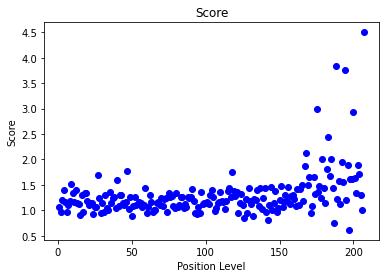

In [75]:
plt.scatter(X, y, color='blue') 
plt.title('Score')
plt.xlabel('Position Level')
plt.ylabel('Score')
plt.show()

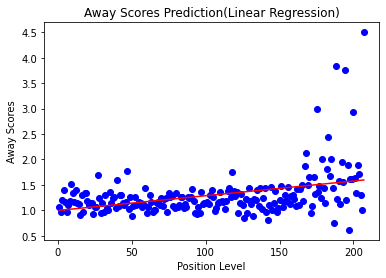

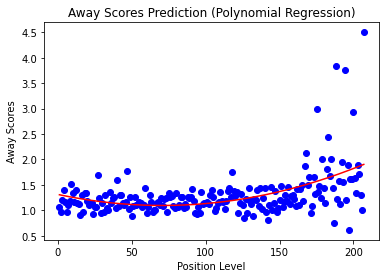

In [76]:
# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Away Scores Prediction(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Away Scores')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Away Scores Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Away Scores')
plt.show()

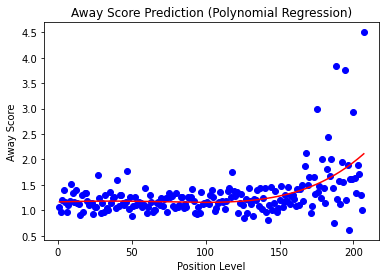

In [77]:
# Let's improve it the model further

# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Away Score Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Away Score')
plt.show()

In [78]:
# Predict using linear regression
lin_pred = reg_line.predict([[100]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[100]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

Linear prediction: 1
Polynomial prediction: 1


##**Logistic Regression**

In [79]:

#Creating a new column 'Status' 
def f(row):
    if row['home_score'] == row['away_score']:
        val = 'Draw'
    elif row['home_score'] > row['away_score']:
        val = 'Win'
    else:
        val = 'Lose'
    return val

final_dataset['Status'] = final_dataset.apply(f, axis=1)

final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank,Status
0,1872-11-30,0,0,0,11.0,30.0,Draw
1,1873-03-08,4,2,0,30.0,11.0,Win
2,1874-03-07,2,1,0,11.0,30.0,Win
3,1875-03-06,2,2,0,30.0,11.0,Draw
4,1876-03-04,3,0,0,11.0,30.0,Win


In [80]:
# Categorical boolean mask
categorical_feature_mask = final_dataset.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = final_dataset.columns[categorical_feature_mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
final_dataset[categorical_cols] = final_dataset[categorical_cols].apply(lambda col: le.fit_transform(col))
final_dataset[categorical_cols]

,Status
0,0
1,2
2,2
3,0
4,2
...,...
332006,2
332011,2
332016,0
332021,0


0 = draw

1 = lose

2 = win

In [81]:
#previewing the dataset
final_dataset.head()

,date,home_score,away_score,tournament,away_team_rank,home_team_rank,Status
0,1872-11-30,0,0,0,11.0,30.0,0
1,1873-03-08,4,2,0,30.0,11.0,2
2,1874-03-07,2,1,0,11.0,30.0,2
3,1875-03-06,2,2,0,30.0,11.0,0
4,1876-03-04,3,0,0,11.0,30.0,2


In [82]:
#Splitting the data
X = final_dataset.iloc[:, 1:2].values
y = final_dataset.iloc[:, 6].values
print(X)
print(y)

[[0]
 [4]
 [2]
 ...
 [0]
 [2]
 [1]]
[0 2 2 ... 0 0 1]


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [84]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [86]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[   0, 1080,  301],
       [   0, 1574,  204],
       [   0,  602, 2444]])

In [87]:
#accuracy score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.65


In [88]:
final_dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
final_dataset

,Actual,Predicted
0,0,1
1,0,1
2,2,2
3,2,2
4,2,2
...,...,...
6200,1,1
6201,2,1
6202,2,1
6203,1,2


In [89]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4009669621273167
Mean Squared Error: 0.49798549556809024
Root Mean Squared Error: 0.7056808737439965
